In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder               # Label Encoder if we have 2 values we encode them (0,1) but if we have more than 2 like 4 (ordered) values then (0, 1, 2, 3) (only for ORDERED Values otherwise we use One Hot Encoding)
#                                                              also Decision Tree does not need One Hot Coding it can figure out.
from sklearn.tree import DecisionTreeClassifier, plot_tree   # Decision Tree Mdoel, plot_tree used to Visualise it using pit graph
from sklearn.metrics import accuracy_score                   # we use accuracy_score from metrics in CLASSIFIER MODELS whereas we use builtin function Model.score() in Linear Models
import matplotlib.pyplot as plt                              # pit graph

In [2]:
df = pd.read_csv("Datasets/Titanic.csv")

In [5]:
df.head(60)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df['Age'].fillna(df['Age'].median())                    # Median - filling average age in NaN values 
df['Embarked'].fillna(df['Embarked'].mode()[0])         # Mode - filling with most common used Category like there are : S, Q, C so if S is used mostly it will fill S with NaN values
df['Fare'].fillna(df['Fare'].median())                  # Median - Same for fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [8]:
Features = df[['Pclass','Sex','Age','SibSp','Parch','Fare', 'Embarked']]   #including only dependent columns that affects our decision
Features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [9]:
Target = df['Survived']
Target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [10]:
LE = LabelEncoder()
Features['Sex'] = LE.fit_transform(Features['Sex'])
Features['Embarked'] = LE.fit_transform(Features['Embarked'])

/tmp/ipykernel_740/3849418542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Features['Sex'] = LE.fit_transform(Features['Sex'])
/tmp/ipykernel_740/3849418542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Features['Embarked'] = LE.fit_transform(Features['Embarked'])


In [11]:
Features.head() # (891, 7) : (891 rows, 7 columns)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [12]:
Features_train, Features_test, Target_train, Target_test = train_test_split(Features, Target, test_size=0.2, random_state=42)

In [43]:
# Features_train.shape        (712, 7) : (712 rows, 7 columns)
# Features_test.shape         (179, 7) : (179 rows, 7 columns)
# Target_train.shape          (712, 1) : (712 rows, 1 column)    
# Target_test.shape           (179, 1) : (179 rows, 1 column)

In [14]:
DT = DecisionTreeClassifier(max_depth=3, random_state=42)
DT.fit(Features_train, Target_train)
Predictions = DT.predict(Features_test)

In [15]:
print("Decision Tree Model Score: {:.2f}%".format(accuracy_score(Target_test,Predictions)*100))

Decision Tree Model Score: 79.89%


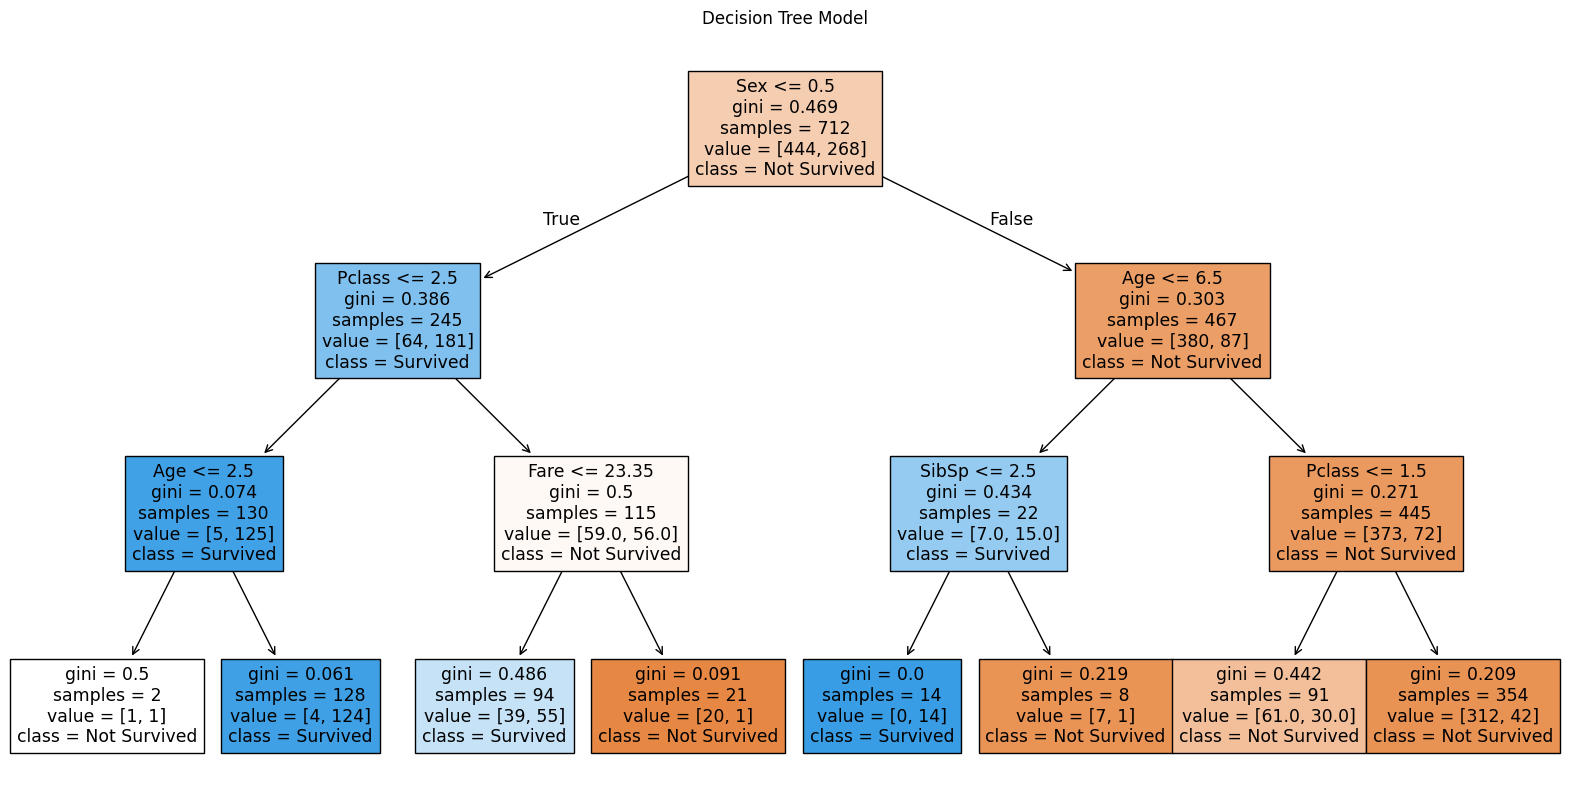

In [16]:
plt.figure(figsize=(20,10))
plot_tree(DT, filled=True, feature_names=Features.columns, class_names=["Not Survived", "Survived"])
plt.title("Decision Tree Model")
plt.show()